# Actividad Evaluable: Patrones con K-means

## Carga tus datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data from TC1002S/covid19_tweets.csv

df = pd.read_csv("TC1002S/covid19_tweets.csv")
 # Displaying the title of the columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [10]:
# Displaying the first 5 rows of the data
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variable.

Voy a eliminar las variables no numéricas ya que necesitaría hacer un análisis a través de lenguaje natural para poder obtener información de ellas. Y en este caso para hacer un cruce de dos variables, decido usar user_friends e user_favourites, ya que me gustaría observar esta relación. 

In [12]:
# Dropping the columns that are not going to be used
df.drop(['user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_verified', 'date', 'hashtags', 'source', 'is_retweet', 'text'], axis=1)



,user_friends,user_favourites
0,950,18775
1,1677,24
2,9525,7254
3,987,1488
4,168,101
...,...,...
74431,586,1902
74432,1066,53569
74433,102,16
74434,1733,129104


## 3. Determina un valor de k

/home/plpcollado/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/plpcollado/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='user_friends', ylabel='user_favourites'>

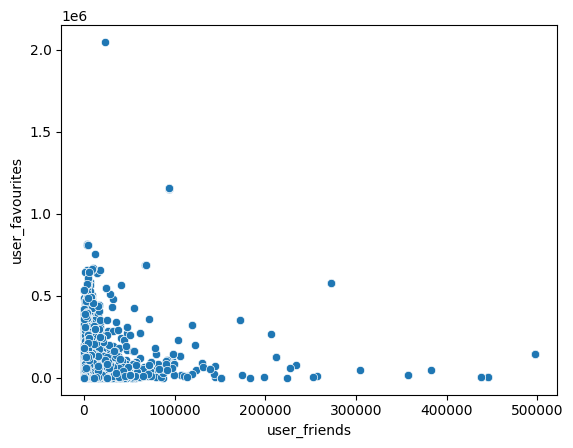

In [13]:
# First we make a scatter plot to see the distribution of the data
sns.scatterplot(x=df['user_friends'], y=df['user_favourites'])


In [17]:
# Observing the scatterplot I decide to cluster the data in 4 groups
n = 3

## 4. Utilizando scikitlearn calcula los centros del algoritmo k-means

/home/plpcollado/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/plpcollado/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/plpcollado/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/plpcollado/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

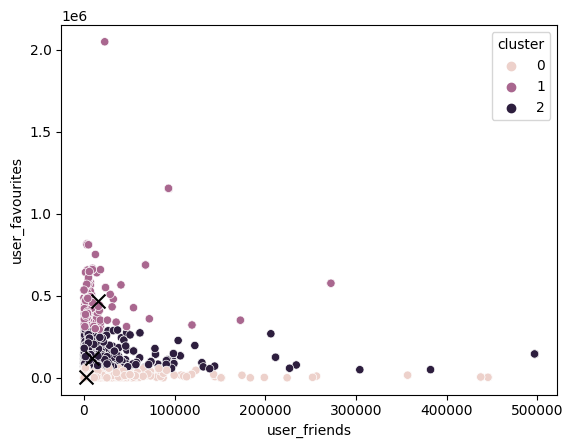

In [19]:
# Using the KMeans algorithm to cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n, random_state=0).fit(df[['user_friends', 'user_favourites']])
df['cluster'] = kmeans.labels_

# Plotting the clusters in a scatterplot with its centroids
sns.scatterplot(x=df['user_friends'], y=df['user_favourites'], hue=df['cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='x', s=100)




In [20]:
# Calculate distance between each centroid
from scipy.spatial import distance_matrix
dist_matrix = pd.DataFrame(distance_matrix(kmeans.cluster_centers_, kmeans.cluster_centers_), index=['c1', 'c2', 'c3'], columns=['c1', 'c2', 'c3'])
dist_matrix


,c1,c2,c3
c1,0.000000,460686.378703,113239.067446
c2,460686.378703,0.000000,347517.108811
c3,113239.067446,347517.108811,0.000000


## Basado en los centros responde las siguientes preguntas

1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué? Si, estos centros son representativos de acuerdo al algoritmo k-means, sin embargo los datos tienen outliers que pueden ser descartados para tener una mejor representación de los datos.

2. ¿Cómo obtuviste el valor de k a usar? Observando el scatterplot, intente usar un valor de k=4, sin embargo este se encontraba muy fragmentado, sobre todo entre los valores 0 y 1, por lo que decidí ante la observación que lo idóneo era entre 2 y 3, por lo que decidí usar k=3, ya que se observa una mejor distribución de los datos.

3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo? No, ya que al usar un valor más alto, se fragmentan más los datos, y al usar un valor más bajo, se pierde información de los datos.

4. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que este muy cercano a otros? Con la matriz de distancias, se observa que los centros 0 y 1 son los más cercanos, y el centro 2 es el más alejado de los otros dos. Intuyo que pueda ser que al final fuera más conveniente usar un valor de k=2.

5. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes? Los centros se verían afectados, ya que los outliers afectan la media y la desviación estándar, de hecho justamente este efecto se observa en el centro 2, ya que es el más alejado de los otros dos.

6. ¿Qué puedes decir de los datos basándose en los centros? Que existe un cluster 0 que tiene un valor de user_friends y user_favourites muy bajo, un cluster 1 que tiene un valor de user_friends y user_favourites muy alto, y un cluster 2 que tiene un valor de user_friends y user_favourites medio. Este cluser 1 podría ser un cluster que bien podría caracterizar al grupo de usarios bots, ya que tienen un número de amigos y favoritos muy alto, por otra parte el cluster 0 podrías ser un cluster que caracteriza a los usuarios que no son bots, ya que tienen un número de amigos y favoritos muy bajo, y el cluster 2 podría ser un cluster que caracteriza a los usuarios que tampoco son bots, pero que tienen un número de amigos y favoritos medio, lo cual podría indicar usuarios que están con buena actividad en la red social y que reacción más que los usuarios del cluster 0.